In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import pylab as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
from sklearn.decomposition import PCA
#plt.rcParams['figure.figsize'] = (20., 15.)
#plt.rcParams['font.size'] = 20

Importing the data.
We remove all the duplicates (when a couple year/country appears twice or more we take the mean)

In [4]:
data = pd.read_csv("data_source/income_GDP_data.csv")
data = data.groupby(['code', 'year'], as_index=False).mean().dropna(how='all')
print "number of year/country points : ", len(data)

number of year/country points :  12246


In [5]:
numerical_variables = data.keys().tolist()
del numerical_variables[0], numerical_variables[0], numerical_variables[-1]
is_gdp = np.array([item.split('_')[0] == "GDP" or item.split('_')[0] == "national" for item in numerical_variables])
numerical_variables = np.array(numerical_variables)[is_gdp].tolist() + np.array(numerical_variables)[np.array([not x for x in is_gdp])].tolist()

Group of variable w.r.t their origin

In [6]:
origins = np.array([item.split('_')[-1] for item in numerical_variables])
sources = set(origins)
origins = {source: np.array(numerical_variables)[origins==source] for source in sources}

## Fullness of the dataset

Fullness of data per variable

In [7]:
(-data[numerical_variables].isnull().sum() + len(data)) / len(data)

GDP_MP_WB                    0.812837
GDP_growth_WB                0.811612
GDP_PC_WB                    0.437857
GDP_OECD                     0.148538
GDP_CAP_OECD                 0.143639
gini_DS                      0.096440
Q4_DS                        0.056182
Q3_DS                        0.056182
Q2_DS                        0.056182
Q1_DS                        0.056263
D1_WB                        0.102482
D9_WB                        0.102482
QU1_WB                       0.102482
QU2_WB                       0.102482
QU3_WB                       0.102482
QU4_WB                       0.102482
QU5_WB                       0.102482
gini_post_taxe_OECD          0.028172
gini_before_taxe_OECD        0.037563
median_income_OECD           0.031929
palma_OECD                   0.031929
P90/P10_OECD                 0.031684
P90/P50_OECD                 0.031684
P50/P10_OECD                 0.031684
S80/S20_OECD                 0.031929
S90/S10_OECD                 0.031929
D1_WID      

Fullness of data per country

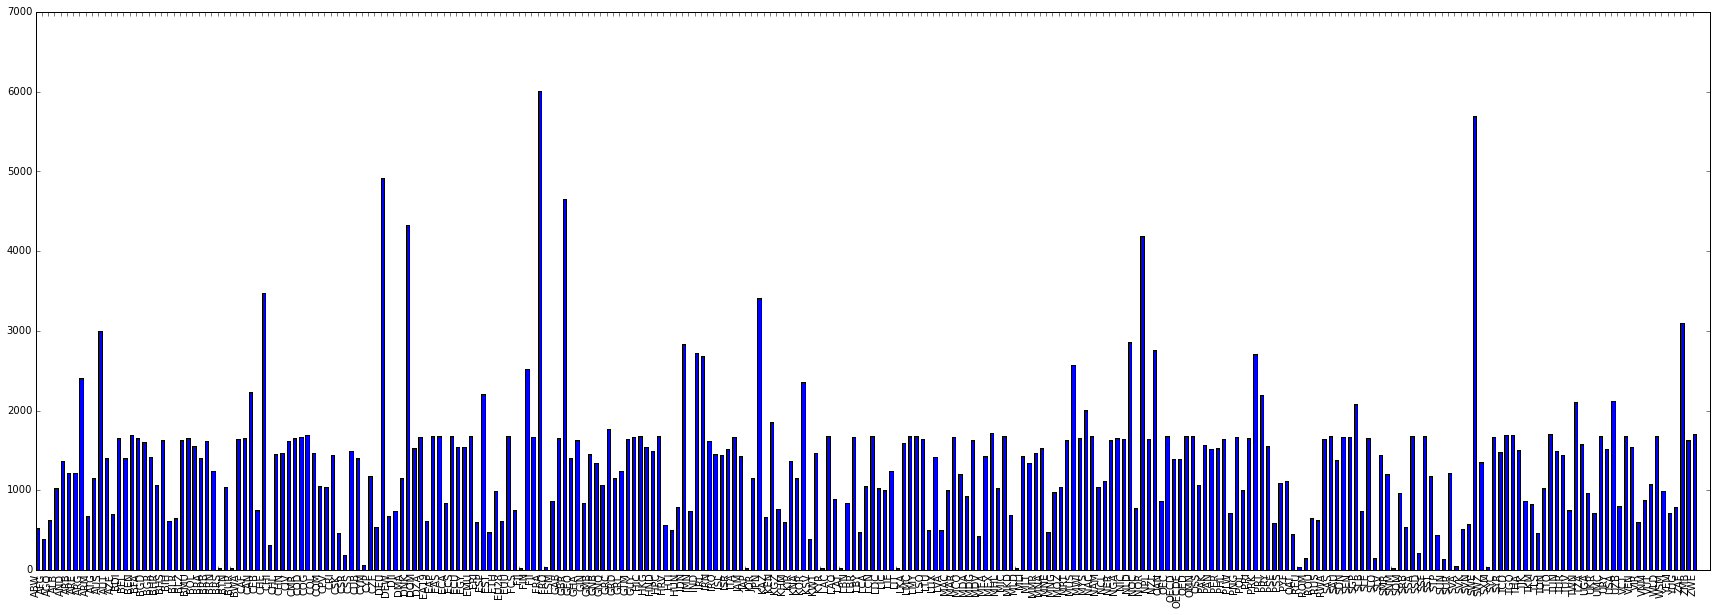

In [8]:
graph = pd.DataFrame(pd.DataFrame(data['code']).join(data[numerical_variables].isnull()).groupby('code').sum().sum(axis=1))
graph.columns = ['size']
x = np.arange(len(graph)) * 1.5
labels = graph.index.tolist()
fig, ax = plt.subplots(figsize=(30,10))
plt.bar(x, graph['size'])
plt.xticks(x, labels, rotation='vertical')
plt.savefig("country_data_distribution")
plt.show()

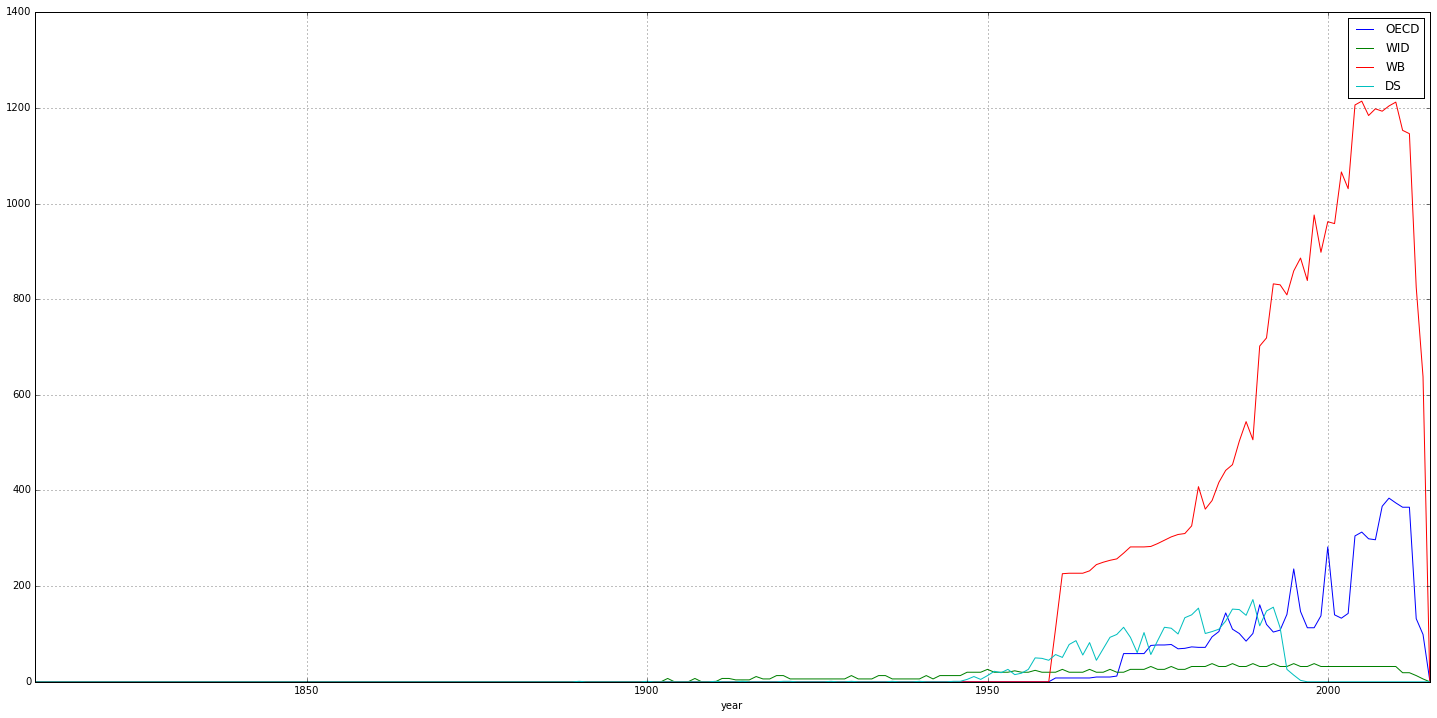

In [9]:
for var in origins.keys():
    truc = data[origins[var].tolist()+['year']]
    truc.index = truc['year']
    del truc['year']
    truc.isnull().applymap(lambda x: not x).sum(axis=1).groupby(truc.index).sum().plot(figsize=(25,12), label=var)
plt.legend()

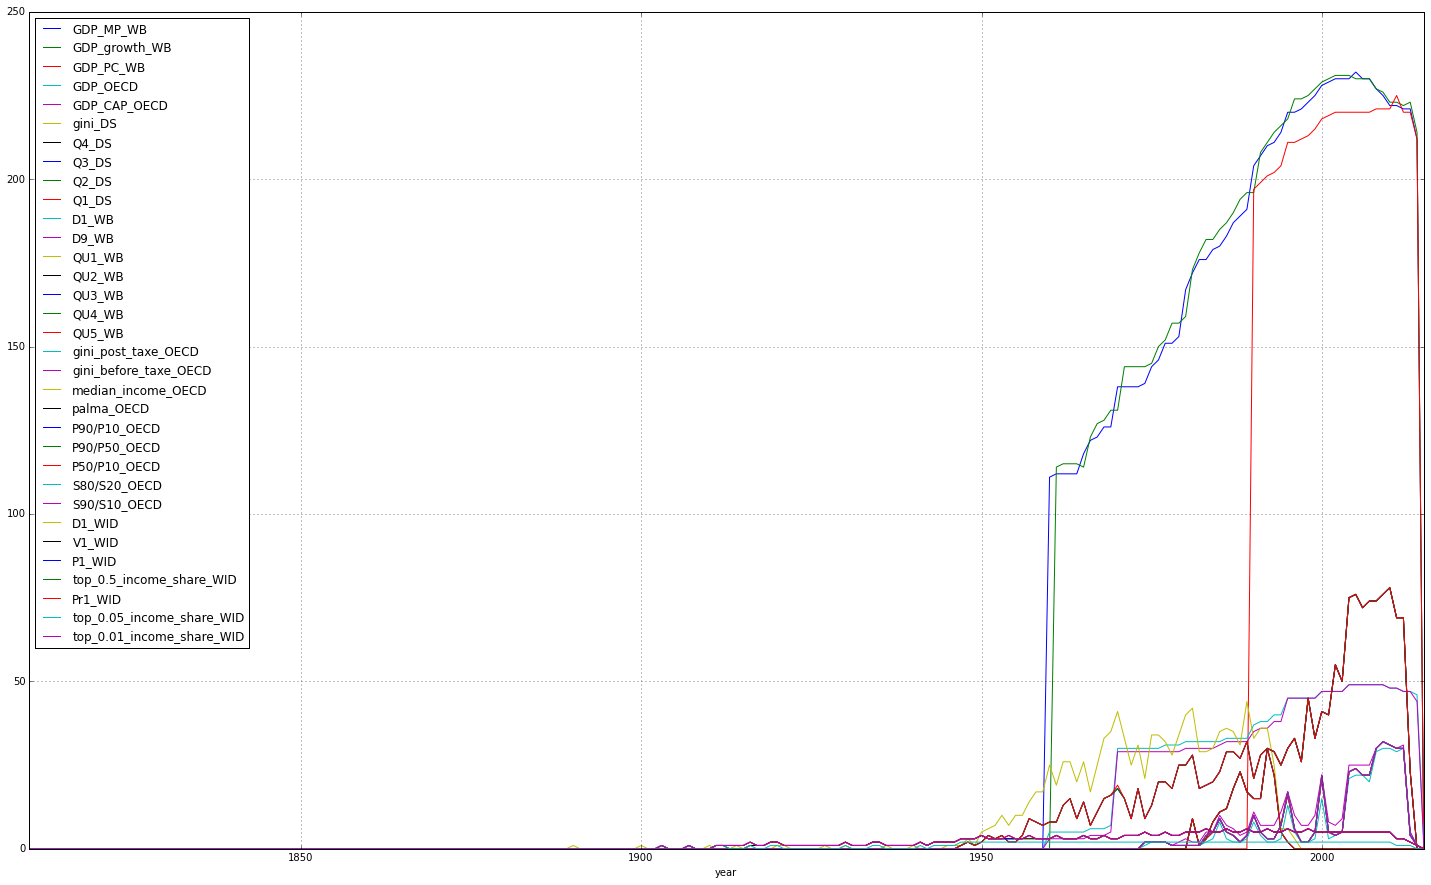

In [10]:
truc = data[numerical_variables + ['year']].copy()
truc.index = truc['year']
del truc['year']
truc.isnull().applymap(lambda x: not x).groupby(truc.index).sum().plot(figsize=(25,15), label=var)

## Correlation between variables

In [11]:
country = 'DEU'

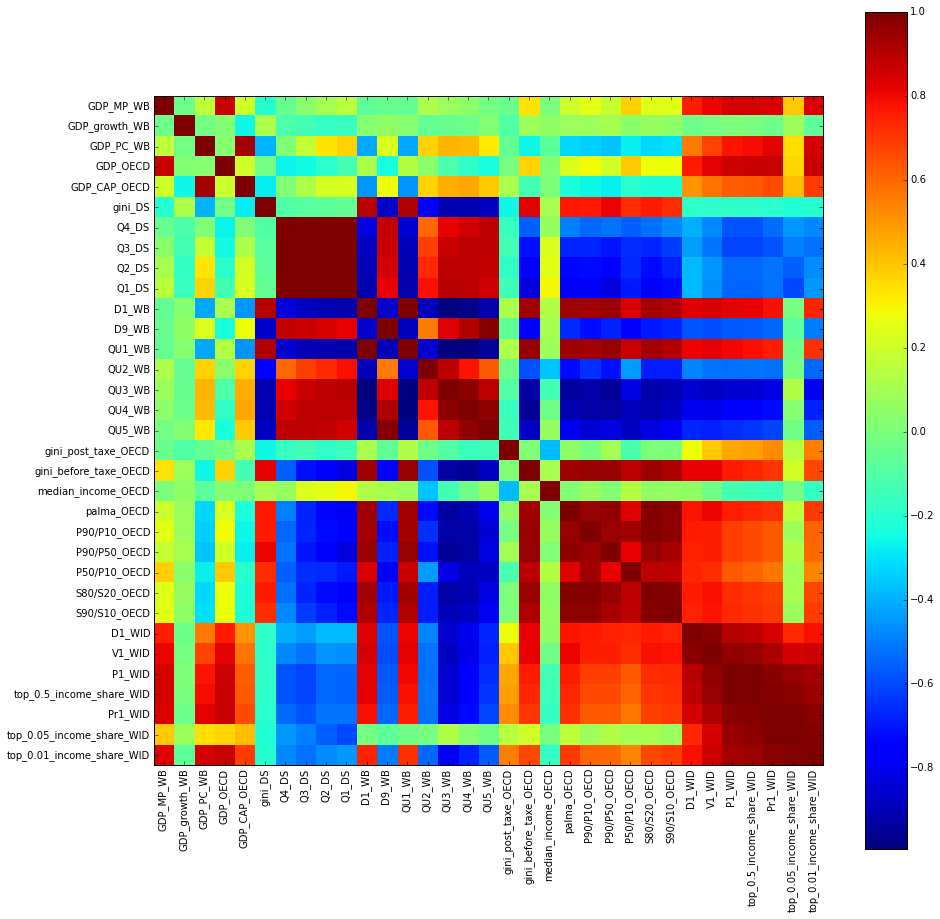

In [12]:
selection = data # [data['code']== country].copy()
selection.index = selection[['year', 'code']]
selection = selection.sort_index()
selection = selection[numerical_variables]
correlations = selection.corr(min_periods=10)
fig = plt.figure(figsize=(15,15))
plt.imshow(correlations, interpolation='nearest')
plt.xticks(range(0, len(selection.columns)), selection.columns, rotation='vertical')
plt.yticks(range(0, len(selection.columns)), selection.columns, rotation='horizontal')
plt.colorbar()
plt.savefig("graphs/correlations_variables.png")

Impossible to make easily a PCA because of missing data TODO aks Pierre what to do

## Dataviz

Selects randomly a country and simply plots all the data. 

Country :  DEU


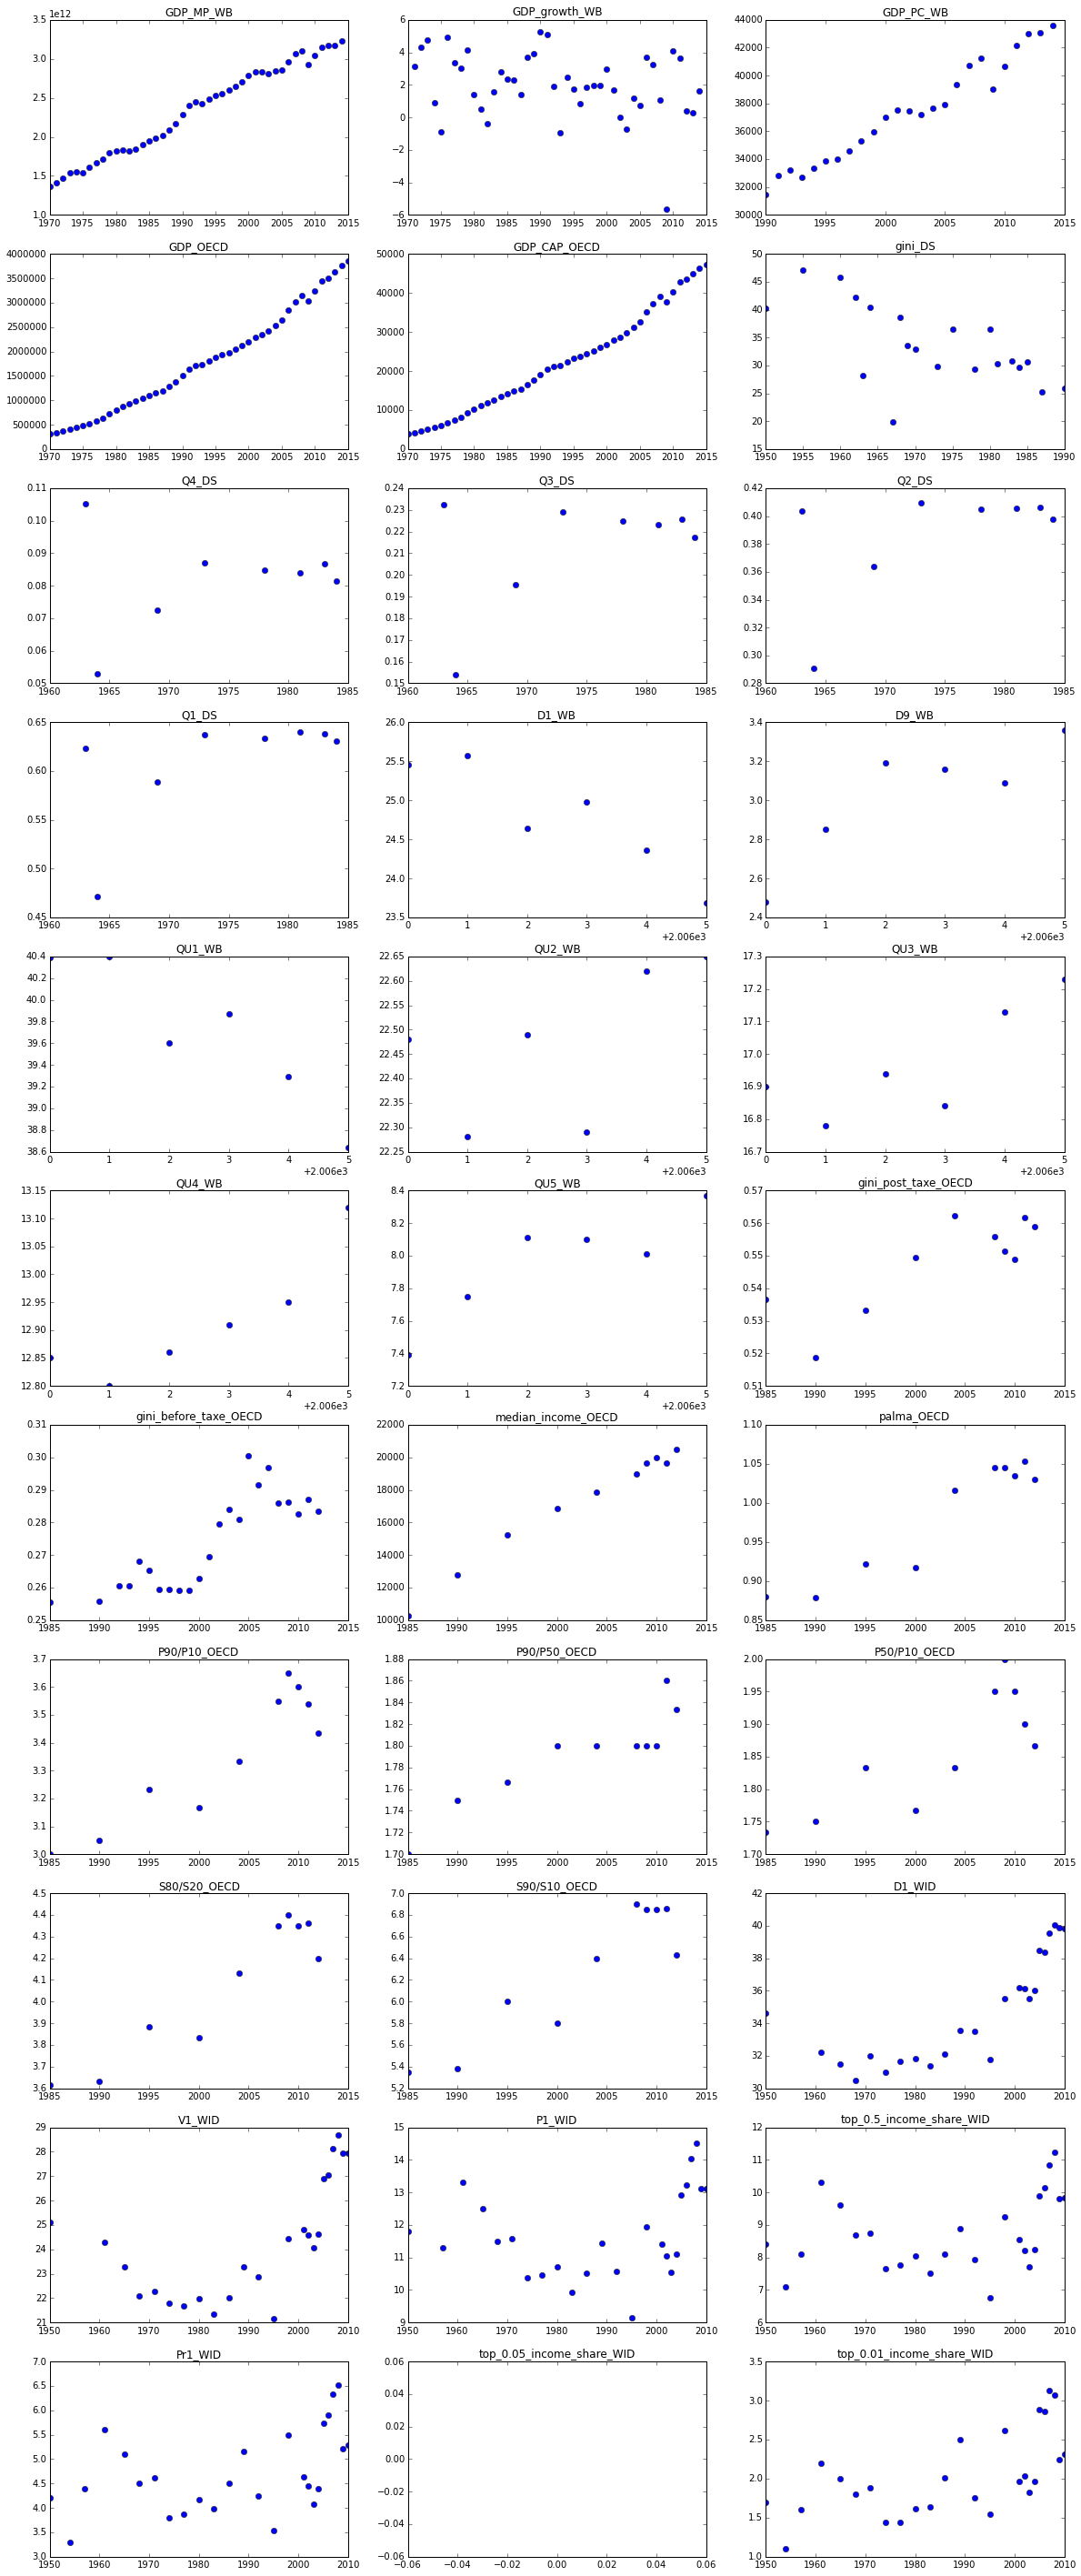

In [26]:
country = "DEU" #np.random.choice(data['code'])
print "Country : ", country
selection = data[data['code']==country]
f, axarr = plt.subplots(11, 3, figsize=(20,50))
x = selection['year']
for n, var in enumerate(numerical_variables):
    i,j = n/3, n%3
    y = selection[var]
    axarr[i, j].plot(x, y, 'o')
    axarr[i, j].set_title(var)

## Investigating the DS data issue

In [230]:
(data["Q1_DS"] + data["Q2_DS"] + data["Q3_DS"] + data["Q4_DS"]).dropna()

230    1.07100
236    0.96700
238    1.03200
292    1.07100
411    1.25600
413    1.25820
420    1.20720
422    1.12240
423    1.07300
425    1.20872
429    1.20214
430    1.04410
433    1.20640
434    1.02300
469    1.30200
...
12006    1.196300
12020    1.276315
12025    1.256984
12026    1.234547
12027    1.243629
12028    1.222067
12029    1.223478
12030    1.160877
12031    1.253518
12084    0.670000
12112    0.603700
12134    0.921000
12151    0.817000
12166    1.003200
12221    0.721900
Length: 688, dtype: float64

In [ ]:
data[data['code']=='FRA'][np.delete(origins["DS"], 0)].dropna

In [186]:
data.groupby(['code', 'year']).mean().dropna(how='all')

gini_DS   Q1_DS   Q2_DS   Q3_DS   Q4_DS  D1_WB  D9_WB  QU1_WB  \
code year                                                                  
ABW  1994      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     1995      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     1996      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     1997      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     1998      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     1999      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2000      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2001      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2002      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2003      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2004      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2005      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2006      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2007      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2008      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2009      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2011      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
AFG  2002      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2003      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2004      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2005      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2006      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2007      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2008      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2009      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2010      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2011      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2012      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2013      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2014      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
...            ...     ...     ...     ...     ...    ...    ...     ...   
ZWE  1985      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     1986      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     1987      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     1988      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     1989      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     1990    56.83  0.0398  0.1027  0.2028  0.3766    NaN    NaN     NaN   
     1991      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     1992      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     1993      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     1994      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     1995      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     1996      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     1997      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     1998      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     1999      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2000      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2001      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2002      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2003      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN   
     2004      NaN     NaN     NaN     NaN     NaN    NaN  